In [1]:
text = """The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S.
  Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering.
  Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest
  of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third
  of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually
  the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the
  other four orbiters; she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the
  Challenger and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle
  to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing missions
  to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission.
  In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven total missions flown
  to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange of a resident crew. Under Criterion
  C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents
  a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure
  followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal
  expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable
  TPS; all previous spaceflight vehicles had a single-use, ablative heat shield. Other notable engineering achievements of the orbiter included the
  first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains
  “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown at twenty-five times the speed of sound.
"""

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')

# Removing special characters and digits
formatted_text = re.sub('[^a-zA-Z]', ' ', text)
formatted_text = re.sub(r'\s+', ' ', formatted_text)

# Tokenization
sentences = sent_tokenize(text)  # Tokenize sentences
word_tokens = word_tokenize(formatted_text.lower())  # Tokenize words

# Removing stop words
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in word_tokens if word not in stop_words]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from nltk.probability import FreqDist
import heapq

# Frequency distribution of words
freq_dist = FreqDist(filtered_words)
most_common_words = freq_dist.most_common()

# Scoring sentences
sentence_scores = {}
for sent in sentences:
    for word in nltk.word_tokenize(sent.lower()):
        if word in freq_dist:
            if sent not in sentence_scores:
                sentence_scores[sent] = freq_dist[word]
            else:
                sentence_scores[sent] += freq_dist[word]

# Selecting top n sentences for summary
n = 5  # Adjust n based on how long you want the summary to be
summary_sentences = heapq.nlargest(n, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

print(summary)

According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents
  a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure
  followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal 
  expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. Under Criterion A, Discovery is significant as the oldest
  of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third
  of five orbiters built by NASA. The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. 
  Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Explorati

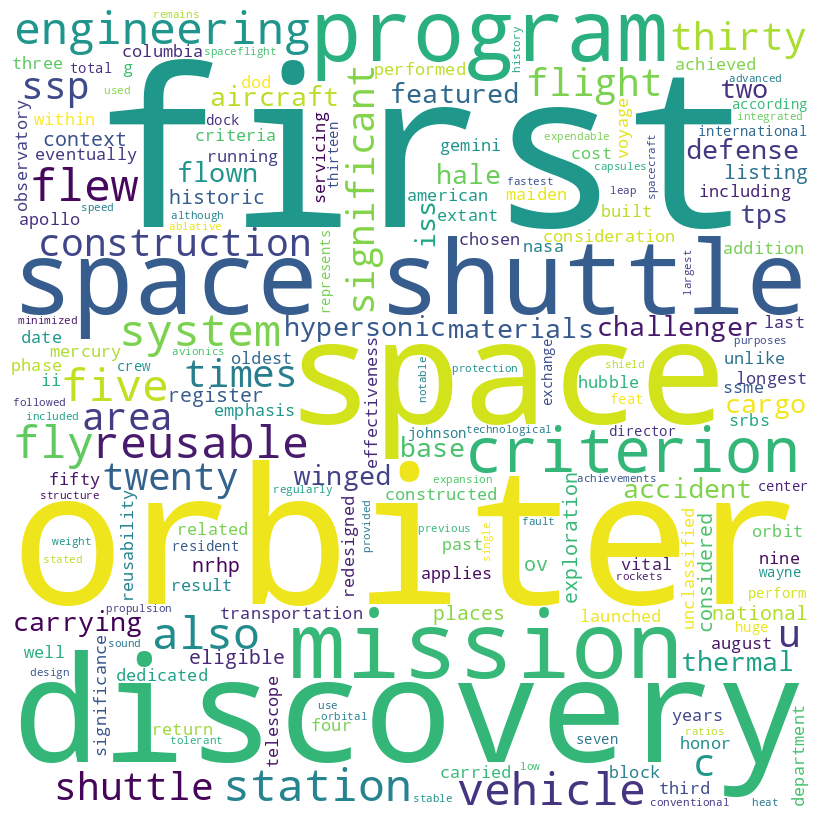

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the original text
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(filtered_words))

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


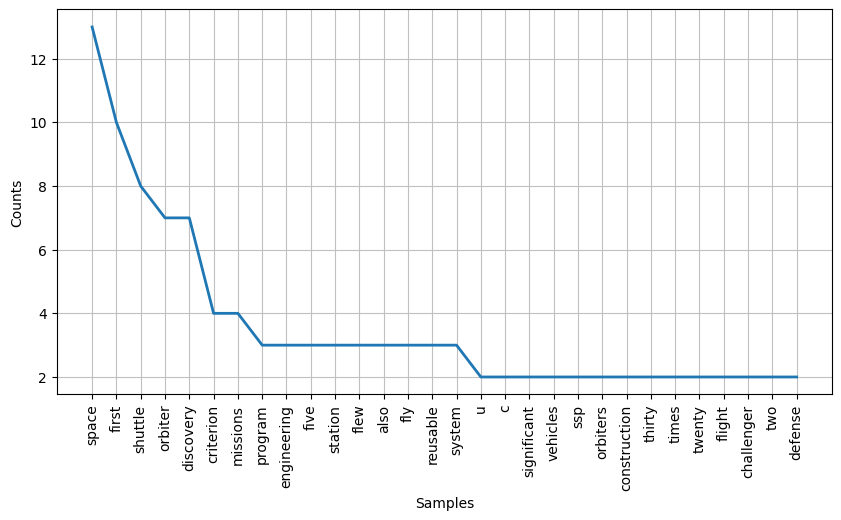

In [5]:
freq_dist = FreqDist(filtered_words)
plt.figure(figsize=(10,5))
freq_dist.plot(30, cumulative=False)  # Adjust the number of words to display as needed
plt.show()
